In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('C:/Users/vishakh/Downloads/train_LZdllcl.csv')
test=pd.read_csv('C:/Users/vishakh/Downloads/test_2umaH9m.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


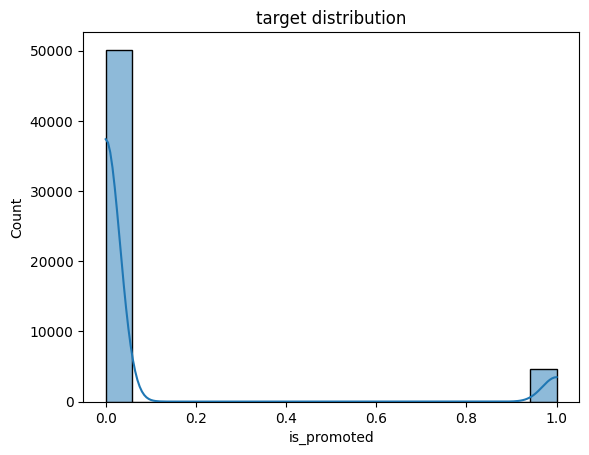

In [10]:
sns.histplot(train['is_promoted'],kde=True)
plt.title('target distribution')
plt.show()

In [34]:
train_x=train.drop(columns=['is_promoted','employee_id'])
train_y=train['is_promoted']

In [12]:
#test_x=test.drop(columns=['is_promoted','employee_id'])
#test_y=test['is_promoted']

In [13]:
numeric_cols1=train_x.select_dtypes(include=['int64','float64']).columns
categorical_cols1=train_x.select_dtypes(include=['object']).columns                                 

In [14]:
train_x[numeric_cols1]=train_x[numeric_cols1].fillna(train_x[numeric_cols1].mean())
for col in categorical_cols1:
    train_x[col]=train_x[col].fillna(train_x[col].mode()[0])

In [15]:
numeric_cols2=test.select_dtypes(include=['int64','float64']).columns
categorical_cols2=test.select_dtypes(include=['object']).columns  

In [16]:
test[numeric_cols2]=test[numeric_cols2].fillna(test[numeric_cols2].mean())
for col in categorical_cols2:
    test[col]=test[col].fillna(test[col].mode()[0])

In [17]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [18]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
#train_x=train.drop(columns=['is_promoted','employee_id'])
#train_y=train['is_promoted']

In [19]:
from sklearn.preprocessing import StandardScaler

In [43]:
numeric_cols=numeric_cols1
scaler=StandardScaler()
train_x_scaled=scaler.fit_transform(train_x[numeric_cols])
test_x_scaled=scaler.transform(test[numeric_cols])
#train_x_scaled=train_x_scaled.drop(columns=['employee_id'],errors='ignore')
#test_x_scaled=test_x_scaled.drop(columns=['employee_id'],errors='ignore')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [45]:
x_train,x_val,y_train,y_val=train_test_split(train_x_scaled,train_y,test_size=0.2,random_state=42)
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [46]:
val_preds=model.predict(x_val)
mse=mean_squared_error(y_val,val_preds)
print("validation MSE:",mse)

validation MSE: 0.07690992352346972


In [47]:
model.fit(train_x_scaled,train_y)

RandomForestRegressor(random_state=42)

In [59]:
test_preds=model.predict(test_x_scaled)

In [60]:
sample_submission=pd.read_csv('C:/Users/vishakh/Downloads/sample_submission_M0L0uXE (1).csv')

In [61]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [62]:
sample_submission['is_promoted']=test_preds

In [63]:
sample_submission.to_csv("final_submission.csv",index=False)

In [67]:
df1=pd.read_excel("C:/Users/vishakh/Downloads/final_submission.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/vishakh/Downloads/final_submission.xlsx'